## This jupyter notebook uses Random Forest (RF) methods to explore the potential of time series VIs to predict winter wheat traits

### Import necessary library

In [27]:
import sklearn
print(sklearn.__version__)
import matplotlib
print(matplotlib.__version__)
import seaborn
print(seaborn.__version__)
import sys
print(sys.version)

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.mixture import GaussianMixture

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#from matplotlib import  pyplot as plt
import numpy as np
import pandas as pd
from imageio import imread
from time import time as timer
import os
import tarfile

import tensorflow as tf

#%matplotlib inline
import umap
#from matplotlib import animation
#from IPython.display import HTML

from scipy.stats import entropy
from sklearn.preprocessing import StandardScaler

import scipy.stats
import matplotlib.pyplot as plt
import io

import seaborn as sns
import statsmodels.api as sm
from scipy import stats

from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.inspection import permutation_importance

import plotly.express as px
import seaborn as sns
sns.set()

import tarfile

import tensorflow as tf
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

import matplotlib.ticker as ticker


1.6.1
3.10.0
0.13.2
3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 15:03:56) [MSC v.1929 64 bit (AMD64)]


### Load and Visualize data

In [13]:
Final_merged_df_HS= pd.read_csv("DatasetForRF.csv",  sep=";")
Final_merged_df_HS

,ID,Year,Location,Town,B2ndNapp_NDRE705,B2ndNapp_NDRE717,B2ndNapp_NDRE740,B2ndNapp_MCARI705,B2ndNapp_MCARI717,B2ndNapp_MCARI740,...,Senescence_MCARI705_MTVI2,Senescence_MCARI717_MTVI2,Senescence_MCARI740_MTVI2,Senescence_MTVI,Senescence_MCARI705_MTVI,Senescence_MCARI717_MTVI,Senescence_MCARI740_MTVI,Straw_Yield,N_Biomass,Grain_Yield
0,1,2020,1260,Changins,0.385299,0.256236,0.059631,0.052072,0.154316,0.363745,...,0.267216,0.647499,1.885771,0.727429,0.198643,0.488663,1.401848,5815.18011,1.6800,7006.66962
1,2,2020,1260,Changins,0.458011,0.315600,0.076430,0.074880,0.234795,0.736065,...,0.235727,0.561814,1.843315,0.612263,0.190016,0.457224,1.485868,7444.98507,1.6125,8020.00425
2,3,2020,1260,Changins,0.363815,0.230424,0.050334,0.074041,0.224519,0.495812,...,0.214398,0.620184,2.554131,0.473202,0.202669,0.595272,2.414394,6599.30078,1.5950,7397.01845
3,4,2020,1260,Changins,0.404397,0.264872,0.055232,0.062814,0.197615,0.515471,...,0.191337,0.517937,1.915228,0.639185,0.155760,0.427175,1.559114,4807.19831,1.8000,6971.63337
4,5,2020,1260,Changins,0.354418,0.218754,0.043939,0.073814,0.222285,0.477037,...,0.291096,0.639122,1.617253,0.494815,0.228034,0.506471,1.266894,2459.40297,0.8800,3219.46971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,71,2022,1260,Changins,0.424121,0.291267,0.085110,0.108220,0.304356,0.754973,...,0.268001,0.703834,1.981140,0.534995,0.224171,0.599128,1.657137,3176.02996,0.9200,6333.52179
178,72,2022,1260,Changins,0.402169,0.275713,0.071555,0.092372,0.261317,0.648344,...,0.288321,0.605898,1.444523,0.330603,0.242384,0.515014,1.214374,2212.12121,0.4200,4723.57245
179,73,2022,1260,Changins,0.400551,0.279979,0.079014,0.099926,0.282620,0.657019,...,0.308423,0.648888,1.448162,0.325316,0.259553,0.552403,1.218698,2752.29358,0.5700,4480.16383
180,74,2022,1260,Changins,0.385413,0.257570,0.069432,0.110396,0.319816,0.684079,...,0.303688,0.758353,2.002271,0.440107,0.263841,0.669952,1.739557,2542.15305,0.3600,4438.39788


In [14]:
Final_merged_df_HS.columns

Index(['ID', 'Year', 'Location', 'Town', 'B2ndNapp_NDRE705',
       'B2ndNapp_NDRE717', 'B2ndNapp_NDRE740', 'B2ndNapp_MCARI705',
       'B2ndNapp_MCARI717', 'B2ndNapp_MCARI740',
       ...
       'Senescence_MCARI705_MTVI2', 'Senescence_MCARI717_MTVI2',
       'Senescence_MCARI740_MTVI2', 'Senescence_MTVI',
       'Senescence_MCARI705_MTVI', 'Senescence_MCARI717_MTVI',
       'Senescence_MCARI740_MTVI', 'Straw_Yield', 'N_Biomass', 'Grain_Yield'],
      dtype='object', length=133)

### Clean data by removing NA

In [15]:
# Remove rows with any NaN values
Final_merged_df_HS_clean = Final_merged_df_HS.dropna()

print(Final_merged_df_HS_clean)

     ID  Year  Location      Town  B2ndNapp_NDRE705  B2ndNapp_NDRE717  \
0     1  2020      1260  Changins          0.385299          0.256236   
1     2  2020      1260  Changins          0.458011          0.315600   
2     3  2020      1260  Changins          0.363815          0.230424   
3     4  2020      1260  Changins          0.404397          0.264872   
4     5  2020      1260  Changins          0.354418          0.218754   
..   ..   ...       ...       ...               ...               ...   
177  71  2022      1260  Changins          0.424121          0.291267   
178  72  2022      1260  Changins          0.402169          0.275713   
179  73  2022      1260  Changins          0.400551          0.279979   
180  74  2022      1260  Changins          0.385413          0.257570   
181  75  2022      1260  Changins          0.367525          0.237743   

     B2ndNapp_NDRE740  B2ndNapp_MCARI705  B2ndNapp_MCARI717  \
0            0.059631           0.052072           0.154316 

### Create a dataframe with only spectral features and scale them

In [16]:
Final_merged_df_HS_sub_clean=Final_merged_df_HS_clean.iloc[:,4:130]
Final_merged_df_HS_sub_clean

,B2ndNapp_NDRE705,B2ndNapp_NDRE717,B2ndNapp_NDRE740,B2ndNapp_MCARI705,B2ndNapp_MCARI717,B2ndNapp_MCARI740,B2ndNapp_MTVI2Heading,B2ndNapp_NDVI,B2ndNapp_NDRE705_NDVI,B2ndNapp_NDRE717_NDVI,...,Senescence_NDRE705_NDVI,Senescence_NDRE717_NDVI,Senescence_NDRE740_NDVI,Senescence_MCARI705_MTVI2,Senescence_MCARI717_MTVI2,Senescence_MCARI740_MTVI2,Senescence_MTVI,Senescence_MCARI705_MTVI,Senescence_MCARI717_MTVI,Senescence_MCARI740_MTVI
0,0.385299,0.256236,0.059631,0.052072,0.154316,0.363745,0.277265,0.605127,0.665840,0.357172,...,0.706904,0.436404,0.211486,0.267216,0.647499,1.885771,0.727429,0.198643,0.488663,1.401848
1,0.458011,0.315600,0.076430,0.074880,0.234795,0.736065,0.437415,0.647203,0.721288,0.398986,...,0.723905,0.462340,0.235934,0.235727,0.561814,1.843315,0.612263,0.190016,0.457224,1.485868
2,0.363815,0.230424,0.050334,0.074041,0.224519,0.495812,0.355450,0.576754,0.658573,0.341044,...,0.746861,0.447833,0.198892,0.214398,0.620184,2.554131,0.473202,0.202669,0.595272,2.414394
3,0.404397,0.264872,0.055232,0.062814,0.197615,0.515471,0.347465,0.605956,0.689808,0.364667,...,0.762065,0.476471,0.237083,0.191337,0.517937,1.915228,0.639185,0.155760,0.427175,1.559114
4,0.354418,0.218754,0.043939,0.073814,0.222285,0.477037,0.333064,0.576247,0.641886,0.325167,...,0.659350,0.395521,0.166237,0.291096,0.639122,1.617253,0.494815,0.228034,0.506471,1.266894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,0.424121,0.291267,0.085110,0.108220,0.304356,0.754973,0.464452,0.661137,0.660726,0.370217,...,0.686677,0.391681,0.158020,0.268001,0.703834,1.981140,0.534995,0.224171,0.599128,1.657137
178,0.402169,0.275713,0.071555,0.092372,0.261317,0.648344,0.422535,0.627855,0.663259,0.368859,...,0.639368,0.380683,0.155501,0.288321,0.605898,1.444523,0.330603,0.242384,0.515014,1.214374
179,0.400551,0.279979,0.079014,0.099926,0.282620,0.657019,0.441037,0.641498,0.655067,0.367921,...,0.622406,0.363356,0.149883,0.308423,0.648888,1.448162,0.325316,0.259553,0.552403,1.218698
180,0.385413,0.257570,0.069432,0.110396,0.319816,0.684079,0.444515,0.639223,0.634109,0.342660,...,0.651454,0.365555,0.137983,0.303688,0.758353,2.002271,0.440107,0.263841,0.669952,1.739557


In [17]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Final_merged_df_HS_sub_clean)

In [18]:
X_Features=X_scaled
print(X_Features)

[[ 0.34511225  0.26699942 -0.08397169 ... -0.1888843  -0.11150898
  -0.23673334]
 [ 1.19230555  1.07832066  0.56044311 ... -0.40953279 -0.45776796
  -0.01895538]
 [ 0.09479108 -0.08577712 -0.44058348 ... -0.0859353   1.06266177
   2.38777566]
 ...
 [ 0.52282541  0.5914875   0.65958223 ...  1.36892361  0.59051472
  -0.71145686]
 [ 0.346442    0.28522775  0.29200796 ...  1.47860104  1.88517211
   0.63860543]
 [ 0.13802108  0.01425226  0.29254953 ...  2.28396345  1.00863622
  -0.9681802 ]]


In [19]:
type(X_Features)

numpy.ndarray

### Define our variable of interest

In [20]:
Y_Variable=Final_merged_df_HS_clean['Grain_Yield'].values
print(Y_Variable)

[7006.66962  8020.00425  7397.01845  6971.63337  3219.46971  3203.90465
 4104.82863  3851.37156  7965.13842  7848.02199  6991.79778  6257.96441
 6179.7186   6790.78744  7172.51993  6896.49507  4032.34198  3792.08057
 3875.92902  3741.65564  6903.16958  7260.61284  7006.96288  6825.86838
 7745.58181  7584.22738  5895.38198  6974.95281  7717.5866   6455.58679
 7066.8173   7476.10149  7083.233041 5863.759102 7716.054379 7229.249655
 6262.046444 2755.373729 7315.079299 6332.730229 4884.866461 7474.918674
 5246.676924 7326.393243 4311.126717 7588.945916 6121.480115 6812.832604
 7221.411927 5565.242241 2909.267538 7265.751004 5498.796489 6385.423261
 3171.94928  3086.217633 5952.681141 7265.833896 4873.105119 5681.209685
 6495.765046 3326.61012  4253.90133  6942.118249 2614.631266 6074.111823
 6795.284577 5686.045686 5196.232693 6610.207363 5543.497533 6544.894566
 8010.178211 6340.419934 6677.717776 6180.41096  5040.612622 5982.940187
 7239.916615 7389.420054 6919.956025 5895.494908 6595.06

In [21]:
type(Y_Variable)

numpy.ndarray

### Prepare dataset for RF model

In [22]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_Features, Y_Variable, test_size=0.2, random_state=42)

print("X_train:\n", X_train)
print(len(X_train))
print("X_test:\n", X_test)
print(len(X_test))
print("y_train:", y_train)
print(len(y_train))
print("y_test:", y_test)
print(len(y_test))

X_train:
 [[ 0.95046837  1.05662474  1.13665454 ... -1.11329135 -0.20932882
  -0.12669545]
 [ 0.87239848  0.84930096  0.92967992 ...  1.42139778  0.72088319
  -0.60460214]
 [-1.2529077  -1.26075048 -1.60709661 ... -0.93897986 -1.06369793
  -0.46080163]
 ...
 [ 0.4443025   0.33393014 -0.23311908 ... -1.70809146 -1.21115261
   0.29384378]
 [-0.95347632 -1.05644924 -1.42675026 ... -0.73042965 -0.4854874
  -0.05232016]
 [-1.16312337 -1.17588503 -1.32944653 ... -1.47664123 -1.63762032
  -0.8699144 ]]
142
X_test:
 [[-0.11109788 -0.23510935 -0.54361479 ... -0.04543751 -0.0843695
  -0.17395478]
 [-1.03183909 -0.9726937  -1.17336173 ... -1.40017672 -1.21443339
  -0.12467633]
 [ 0.49321029  0.50592613  0.61012602 ...  1.66904932  0.79027849
  -1.13476648]
 ...
 [ 0.36193882  0.19809523 -0.28622275 ... -0.39892732  0.65680296
   2.6077955 ]
 [ 0.19456008  0.0714733  -0.3715767  ... -0.24875266  0.90952388
   2.44278977]
 [-1.17372072 -1.16151848 -0.66175962 ... -1.05026143 -1.31488745
  -0.848735

### Run the RF model

In [23]:

# 1. Create the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, n_jobs=-1, verbose=2, random_state=42)

# 2. Cross-validation phase (training)
# Perform cross-validation to evaluate the model's performance on multiple subsets of the training data
t1 = timer()
cv_results = cross_validate(model, X_train, y_train, cv=5, scoring="r2", return_train_score=True, n_jobs=-1)
t2 = timer()
print(f'Training time (Cross-Validation): {t2 - t1:.1f}s')

# Print the cross-validation results
print("\nCross-validation results:")
print("Training R² scores:", cv_results["train_score"])
print("Validation R² scores:", cv_results["test_score"])
print("Mean training R²:", cv_results["train_score"].mean())
print("Mean validation R²:", cv_results["test_score"].mean())
print("Standard deviation of validation R²:", cv_results["test_score"].std())

# 3. Train the model on the full training data (using best hyperparameters if necessary)
model.fit(X_train, y_train)

# 4. Predict on the test set (test phase)
y_pred = model.predict(X_test)

# 5. Evaluate performance on the test set
train_r2 = model.score(X_train, y_train)  # R² for training data
test_r2 = model.score(X_test, y_test)     # R² for test data

# Print R² scores for both training and test sets
print("\nTraining R²:", train_r2)
print("Test R²:", test_r2)

# 6. Calculate and print Mean Squared Error (MSE) on the test set
mse = mean_squared_error(y_test, y_pred)
rmse= np.sqrt(mse)
print("Mean Squared Error on Test Set:", mse)
print("Root Mean Squared Error on Test Set:", rmse)


Training time (Cross-Validation): 1.8s

Cross-validation results:
Training R² scores: [0.98703953 0.98768249 0.98715806 0.98419004 0.9865131 ]
Validation R² scores: [0.86550466 0.91053729 0.88472285 0.91249351 0.91654896]
Mean training R²: 0.9865166443295375
Mean validation R²: 0.8979614542281785
Standard deviation of validation R²: 0.01971563735754704
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
buildi

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.


building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=-1)]: Done  88 out of 100 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  88 out of 100 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=32)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  88 out of 100 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=32)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.



Training R²: 0.9879663944702163
Test R²: 0.9148603904968913
Mean Squared Error on Test Set: 175986.6463213769
Root Mean Squared Error on Test Set: 419.5076236749183


[Parallel(n_jobs=32)]: Done  88 out of 100 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=32)]: Done 100 out of 100 | elapsed:    0.0s finished


### Visualize top 20 most important features

C:\Users\vuill\AppData\Local\Temp\ipykernel_28916\3198049469.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


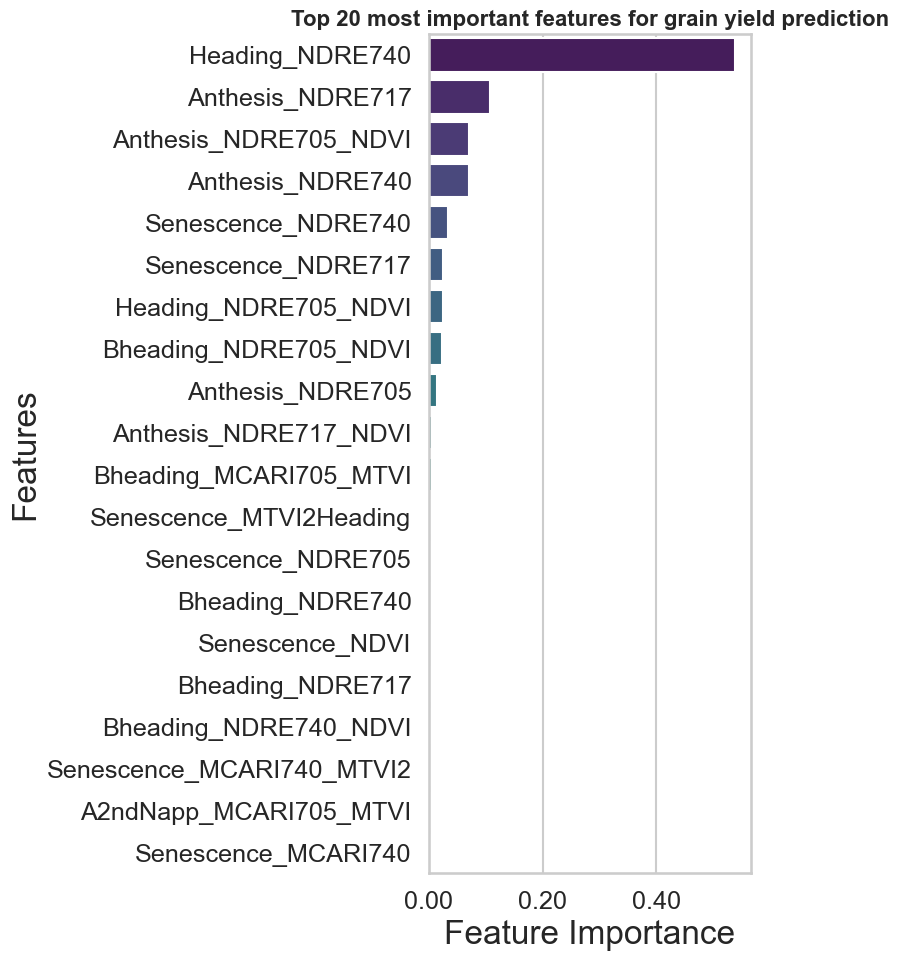

In [26]:
# Set Seaborn theme for scientific aesthetics
sns.set(style='whitegrid', context='talk', font_scale=1.1)

Selected_Features = Final_merged_df_HS_sub_clean.columns.tolist()

# Assuming you have your trained model and feature names
importances = model.feature_importances_
feature_names = Selected_Features

# Create and sort importance DataFrame
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Select top N features
top_n = 20
top_features = feat_imp_df.head(top_n)

# Plot
plt.figure(figsize=(8, 10))  # adjust size for journal format if needed
ax = sns.barplot(
    x='Importance', 
    y='Feature', 
    data=top_features, 
    palette='viridis'
)

# Optional: fine-tuning
ax.set_title(f"Top {top_n} most important features for grain yield prediction", fontsize=16, weight='bold')
ax.set_xlabel("Feature Importance", fontsize=24)
ax.set_ylabel("Features", fontsize=24)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.2f}'))
plt.tight_layout()

# Save high-res figure (e.g. for print publication)
plt.savefig("feature_importance_plot_GrainYield_CH_WA.png", dpi=600, bbox_inches='tight')
plt.savefig("feature_importance_plot_GrainYield_CH_WA.pdf", dpi=600, bbox_inches='tight')

# Show it
plt.show()

### Optimize RF parameters

In [28]:
import numpy as np
from time import time as timer
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 1. Create the RandomForestRegressor model (without specifying parameters yet)
model = RandomForestRegressor(random_state=42, n_jobs=-1, verbose=2)

# 2. Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],        # Number of trees
    'max_depth': [10, 20, 30,None]#,         # Maximum depth of the tree
    #'min_samples_split': [2, 5, 10],         # Minimum samples to split a node
    #'min_samples_leaf': [1, 2, 5],           # Minimum samples required to be at a leaf node
    #'max_features': ['log2','sqrt']  # The number of features to consider for the best split ### 'auto doesnt work
}

# 3. Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)

# 4. Perform the grid search (this will train multiple models with different hyperparameters)
t1 = timer()
grid_search.fit(X_train, y_train)
t2 = timer()
print(f'Grid Search Time: {t2 - t1:.1f}s')

# 5. Print the best parameters and best cross-validation score
print("\nBest Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation R² Score:", grid_search.best_score_)

# 6. Train the model with the best parameters from GridSearchCV
best_model = grid_search.best_estimator_

# 7. Predict on the test set (test phase)
y_pred = best_model.predict(X_test)

# 8. Evaluate performance on the test set
train_r2 = best_model.score(X_train, y_train)  # R² for training data
test_r2 = best_model.score(X_test, y_test)     # R² for test data

# Print R² scores for both training and test sets
print("\nTraining R² with Best Model:", train_r2)
print("Test R² with Best Model:", test_r2)

# 9. Calculate and print Mean Squared Error (MSE) and RMSE on the test set
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean Squared Error on Test Set:", mse)
print("Root Mean Squared Error (RMSE) on Test Set:", rmse)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    0.2s


building tree 1 of 300building tree 2 of 300

building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
b

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.6s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s



Training R² with Best Model: 0.9878034386351225
Test R² with Best Model: 0.9185484221972515
Mean Squared Error on Test Set: 168363.35166144973
Root Mean Squared Error (RMSE) on Test Set: 410.3210348756809


[Parallel(n_jobs=32)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 300 out of 300 | elapsed:    0.0s finished


# Best Hyperparameters found by GridSearchCV:
# 'max_depth': 20       → Limits the depth of each decision tree to prevent overfitting.
# 'n_estimators': 300   → Uses 300 decision trees in the forest, providing a more robust and stable prediction.
# These values were chosen because they gave the highest R² score during 5-fold cross-validation.

C:\Users\vuill\AppData\Local\Temp\ipykernel_28916\901750059.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


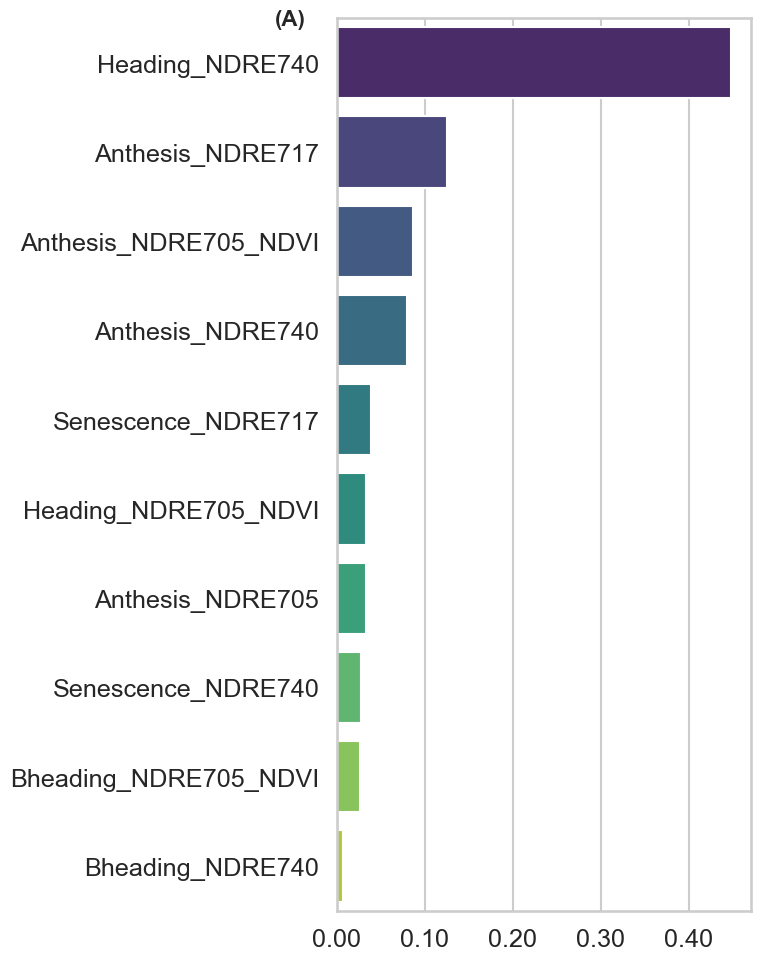

In [29]:
# Set Seaborn theme for scientific aesthetics
sns.set(style='whitegrid', context='talk', font_scale=1.1)

# Assuming you have your trained model and feature names
importances = best_model .feature_importances_
feature_names = Selected_Features

# Create and sort importance DataFrame
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Select top N features
top_n = 10
top_features = feat_imp_df.head(top_n)

# Plot
plt.figure(figsize=(8, 10))  # adjust size for journal format if needed
ax = sns.barplot(
    x='Importance', 
    y='Feature', 
    data=top_features, 
    palette='viridis'
)

# Optional: fine-tuning
#ax.set_title(f"Top {top_n} most important features for grain yield prediction", fontsize=12, weight='bold')
#ax.set_xlabel("Features importance", fontsize=24)
#ax.set_ylabel("Vegetation indices at different crop stages", fontsize=24)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.2f}'))
ax.set_xlabel('')
ax.set_ylabel('')
# Add panel label "(A)" in top-left corner
plt.text(-0.15, 1.01, '(A)', transform=ax.transAxes, fontsize=16, fontweight='bold', va='top', ha='left')

plt.tight_layout()

# Save high-res figure (e.g. for print publication)
plt.savefig("feature_importance_plot_GrainYield_CH_WA.png", dpi=600, bbox_inches='tight')
plt.savefig("feature_importance_plot_GrainYield_CH_WA.pdf", dpi=600, bbox_inches='tight')

# Show it
plt.show()